## ch02

<div style="text-align: right"> <b>Author : Kwang Myung Yu</b></div>
<div style="text-align: right\"> Initial upload: 2022.06.12 </div>
<div style="text-align: right\"> Last update: 2022.06.12</div>

In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [2]:
colors = ["#00798c", "#d1495b", '#edae49', '#66a182', '#4a4a4a',
          '#1a508b', '#e3120b', '#c5a880', '#9F5F80', '#6F9EAF',
          '#0278ae','#F39233', '#A7C5EB', '#54E346', '#ABCE74',
        '#d6b0b1', '#58391c', '#cdd0cb', '#ffb396', '#6930c3']
sns.color_palette(colors[:10])

[(0.0, 0.4745098039215686, 0.5490196078431373),
 (0.8196078431372549, 0.28627450980392155, 0.3568627450980392),
 (0.9294117647058824, 0.6823529411764706, 0.28627450980392155),
 (0.4, 0.6313725490196078, 0.5098039215686274),
 (0.2901960784313726, 0.2901960784313726, 0.2901960784313726),
 (0.10196078431372549, 0.3137254901960784, 0.5450980392156862),
 (0.8901960784313725, 0.07058823529411765, 0.043137254901960784),
 (0.7725490196078432, 0.6588235294117647, 0.5019607843137255),
 (0.6235294117647059, 0.37254901960784315, 0.5019607843137255),
 (0.43529411764705883, 0.6196078431372549, 0.6862745098039216)]

### 결정트리 알고리즘

#### 첫번째 모델

In [3]:
df = pd.read_csv('data/census_cleaned.csv')

In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24420, 92)
(8141, 92)
(24420,)
(8141,)


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [9]:
clf = DecisionTreeClassifier(random_state=2)

In [10]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [11]:
accuracy_score(y_pred, y_test)

0.8131679154894976

In [12]:
clf

DecisionTreeClassifier(random_state=2)

In [13]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


결정트리 작동원리

In [14]:
from sklearn.tree import plot_tree

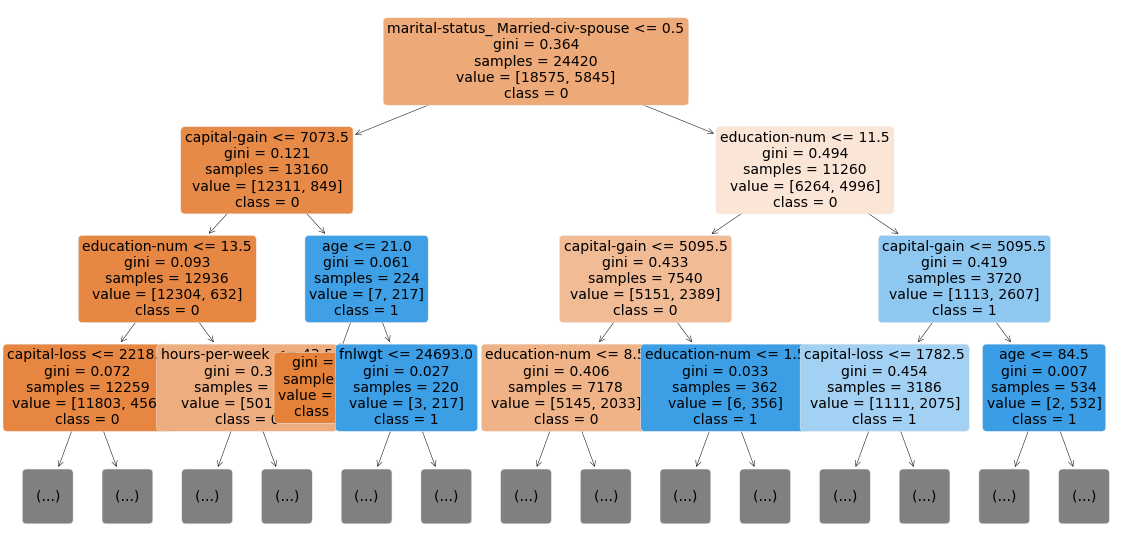

In [18]:
plt.figure(figsize=(20, 10))

plot_tree(clf, max_depth=3, feature_names=list(X.columns), class_names=['0', '1'],
         filled=True, rounded=True, fontsize=14)
plt.show()

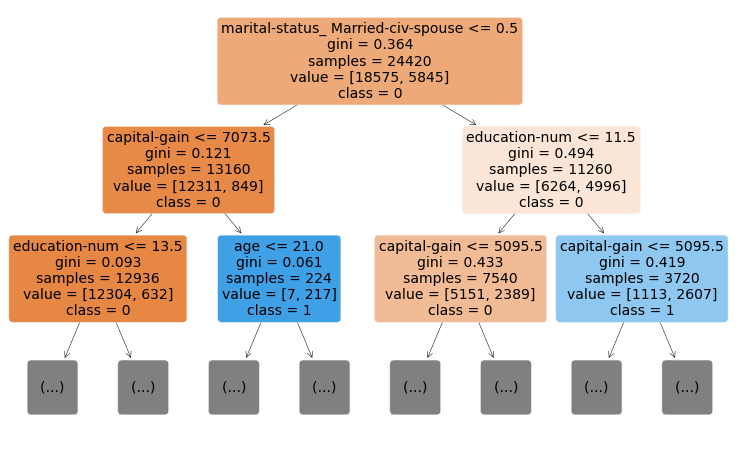

In [19]:
plt.figure(figsize=(13, 8))

plot_tree(clf, max_depth=2, feature_names=list(X.columns), class_names=['0', '1'],
         filled=True, rounded=True, fontsize=14)
plt.show()

### 결정트리 하이퍼파라미터 튜닝

#### 결정트리 회귀모델

In [20]:
# 바이크 데이터셋
df = pd.read_csv('data/bike_rentals_cleaned.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
dtr = DecisionTreeRegressor(random_state=2)

scores = cross_val_score(dtr, X, y, scoring='neg_mean_squared_error',
                        cv = 5)

rmse = np.sqrt(-scores)

print('RMSE 평균: %0.2f' % (rmse.mean()))

RMSE 평균: 1233.36


In [27]:
# DecisionTreeRegressor를 훈련 세트에서 훈련하고 점수를 계산합니다.
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)
from sklearn.metrics import mean_squared_error
reg_mse = mean_squared_error(y_train, y_pred)
reg_rmse = np.sqrt(reg_mse)
reg_rmse

0.0

In [28]:
leaf_node_count = 0
tree = reg.tree_

In [30]:
tree.node_count

1093

In [31]:
for i in range(tree.node_count):
    if (tree.children_left[i] == -1) and (tree.children_right[i] == -1):
        leaf_node_count += 1
        if tree.n_node_samples[i] > 1:
            print('노드 인덱스:', i, ', 샘플 개수:', tree.n_node_samples[i])
print('전체 리프 노드 개수:', leaf_node_count)

노드 인덱스: 123 , 샘플 개수: 2
전체 리프 노드 개수: 547
